In [2]:
# @NOTE: 原始数据读取在extractFeture.py中
# from data import extractFeture

import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from src.data.loaddata import load_data

subject_id = 1
base_path = "data"
all_X,all_y = load_data(subject_id,base_path)

# 合并 all_X 和 all_y
X = np.vstack(all_X)
y = np.concatenate(all_y)

# 初始化 SMOTE 实例
smote = SMOTE()

# 应用 SMOTE 过采样
# @NOTE: 过采样平衡数据
X_resampled, y_resampled = smote.fit_resample(X, y)

# 分割处理后的数据集
# @TODO:了解数据内容与格式
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=0)

Extracting EDF parameters from o:\eeg\epilepsy_EEG_analysis_code\data\chb01\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


o:\eeg\epilepsy_EEG_analysis_code\src\data\extractFeture.py:51: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_name, preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


In [2]:
import pyedflib

# 打开EDF文件
file_path = r"C:\Users\LinziGoooosh\Downloads\chbmit\1.0.0\chb01\chb01_01.edf"
f = pyedflib.EdfReader(file_path)

# 获取并打印基本信息
n_signals = f.signals_in_file
signal_labels = f.getSignalLabels()
print(f"Number of signals: {n_signals}")
print("Signal labels:", signal_labels)

# 读取并打印第一个信号的前10个数据点
signal = f.readSignal(0)
print("First 10 data points of the first signal:", signal[:10])

# 关闭文件
f.close()

Number of signals: 23
Signal labels: ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8']
First 10 data points of the first signal: [-145.93406593    0.1953602     0.1953602     0.1953602     0.1953602
    0.97680098    0.58608059   -1.75824176   -1.36752137    2.93040293]


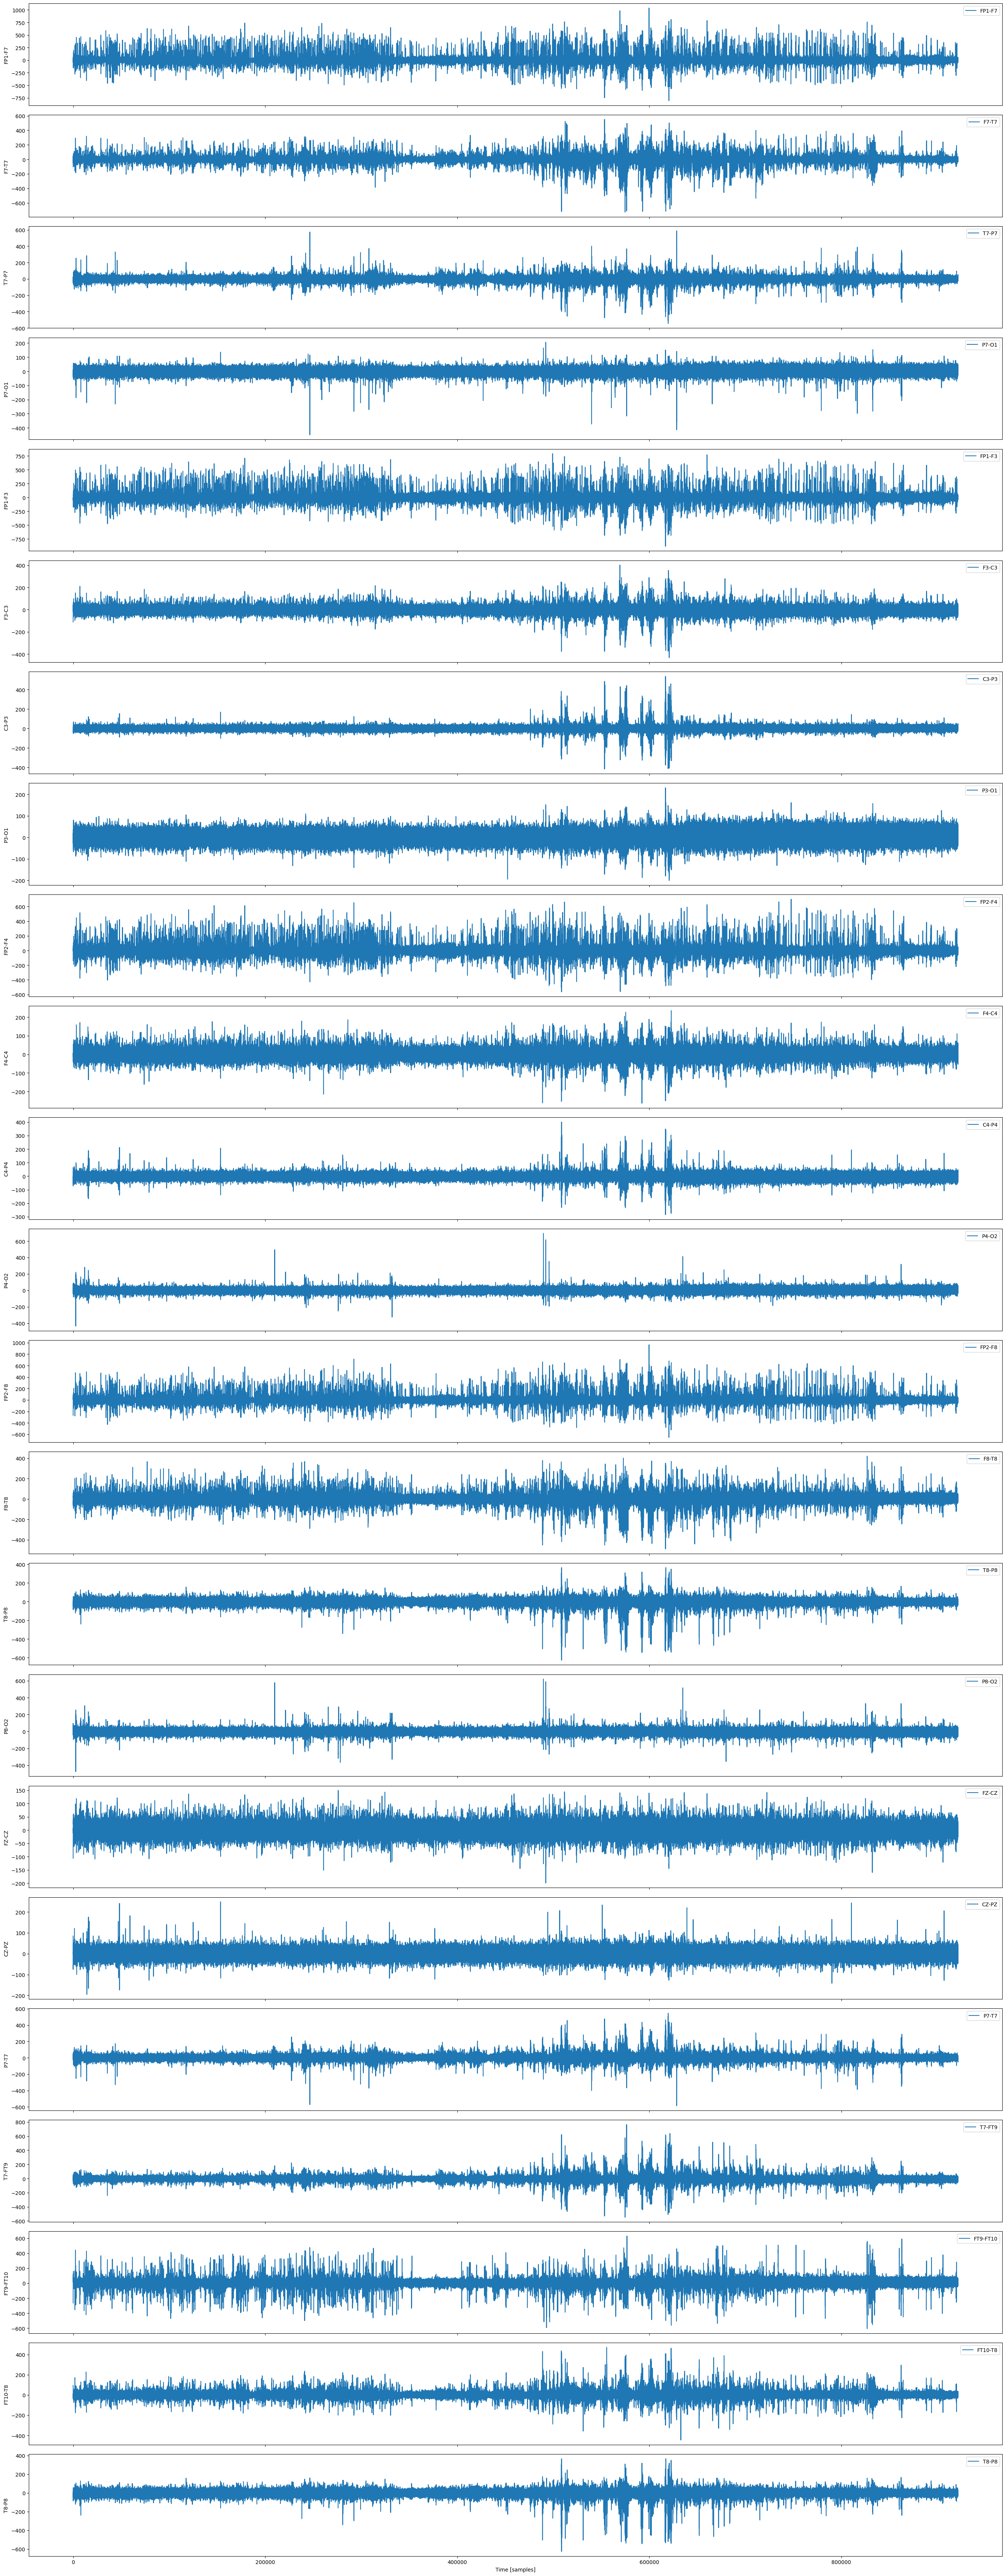

In [6]:
import pyedflib
import matplotlib.pyplot as plt

# 打开EDF文件
file_path = r"C:\Users\LinziGoooosh\Downloads\chbmit\1.0.0\chb01\chb01_01.edf"
f = pyedflib.EdfReader(file_path)

# 获取信号标签
signal_labels = f.getSignalLabels()

# 创建一个图形和子图
fig, axs = plt.subplots(n_signals, 1, figsize=(27, 3*n_signals), sharex=True)

# 遍历每个信号并绘制
for i in range(n_signals):
    signal = f.readSignal(i)
    axs[i].plot(signal, label=signal_labels[i])
    axs[i].set_ylabel(signal_labels[i])
    axs[i].legend()

# 设置x轴标签
axs[-1].set_xlabel('Time [samples]')

# 调整布局并显示图形
plt.tight_layout()
plt.show()

# 关闭文件
f.close()

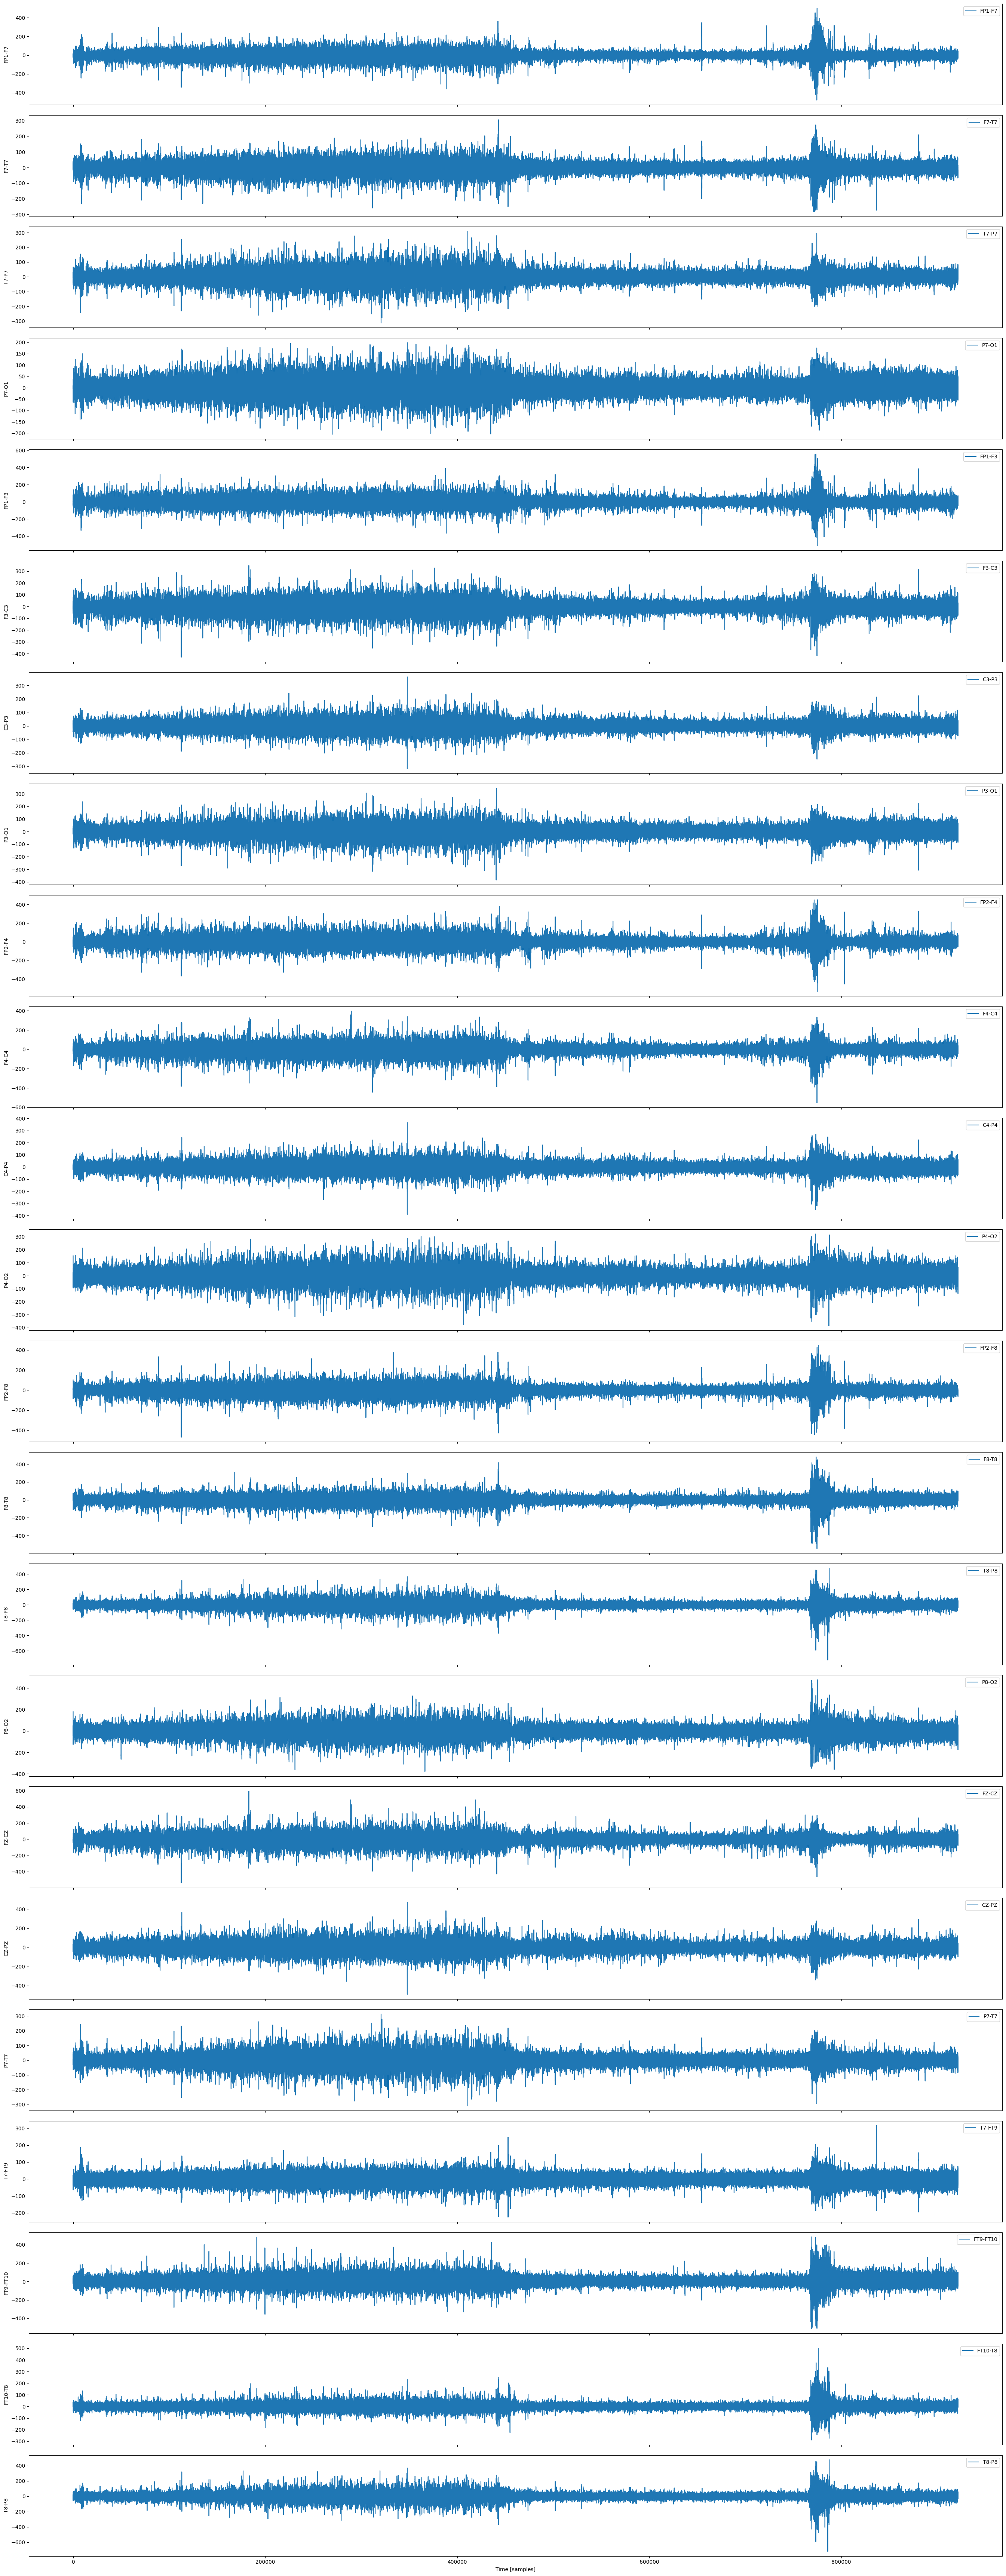

In [7]:
import pyedflib
import matplotlib.pyplot as plt

# 打开EDF文件
file_path = r"C:\Users\LinziGoooosh\Downloads\chbmit\1.0.0\chb01\chb01_03.edf"
f = pyedflib.EdfReader(file_path)

# 获取信号标签
signal_labels = f.getSignalLabels()

# 创建一个图形和子图
fig, axs = plt.subplots(n_signals, 1, figsize=(27, 3*n_signals), sharex=True)

# 遍历每个信号并绘制
for i in range(n_signals):
    signal = f.readSignal(i)
    axs[i].plot(signal, label=signal_labels[i])
    axs[i].set_ylabel(signal_labels[i])
    axs[i].legend()

# 设置x轴标签
axs[-1].set_xlabel('Time [samples]')

# 调整布局并显示图形
plt.tight_layout()
plt.show()

# 关闭文件
f.close()

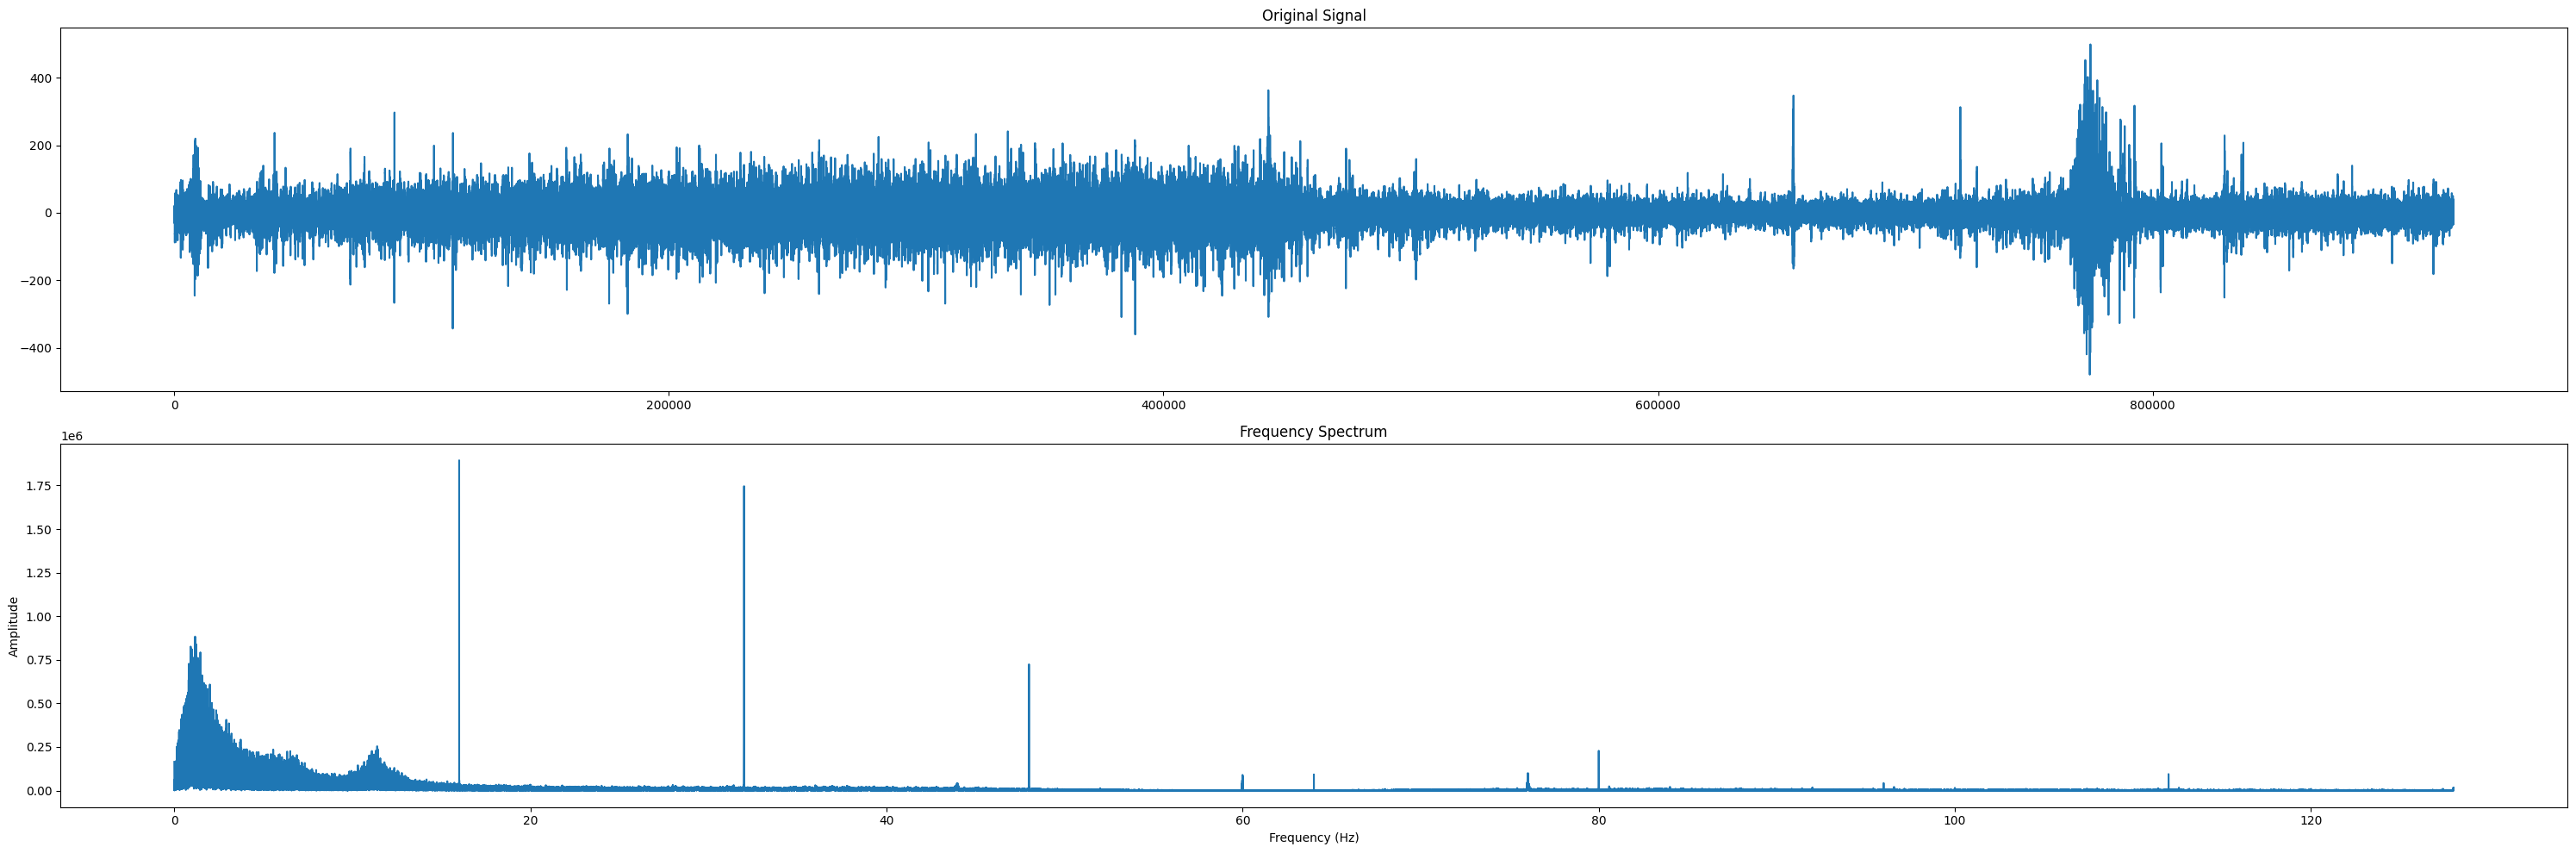

In [10]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt

# 打开EDF文件
file_path = r"C:\Users\LinziGoooosh\Downloads\chbmit\1.0.0\chb01\chb01_03.edf"
f = pyedflib.EdfReader(file_path)

# 读取第一个通道的数据
signal = f.readSignal(0)

# 进行快速傅里叶变换（FFT）
fft_result = np.fft.fft(signal)
fft_freqs = np.fft.fftfreq(len(signal), d=1/f.getSampleFrequencies()[0])  # 假设采样频率是恒定的

# 绘制原始信号
plt.figure(figsize=(30, 10))
plt.subplot(2, 1, 1)
plt.plot(signal)
plt.title('Original Signal')

# 绘制频谱图
plt.subplot(2, 1, 2)
plt.plot(fft_freqs[:len(fft_freqs)//2], np.abs(fft_result[:len(fft_result)//2]))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

# 关闭文件
f.close()

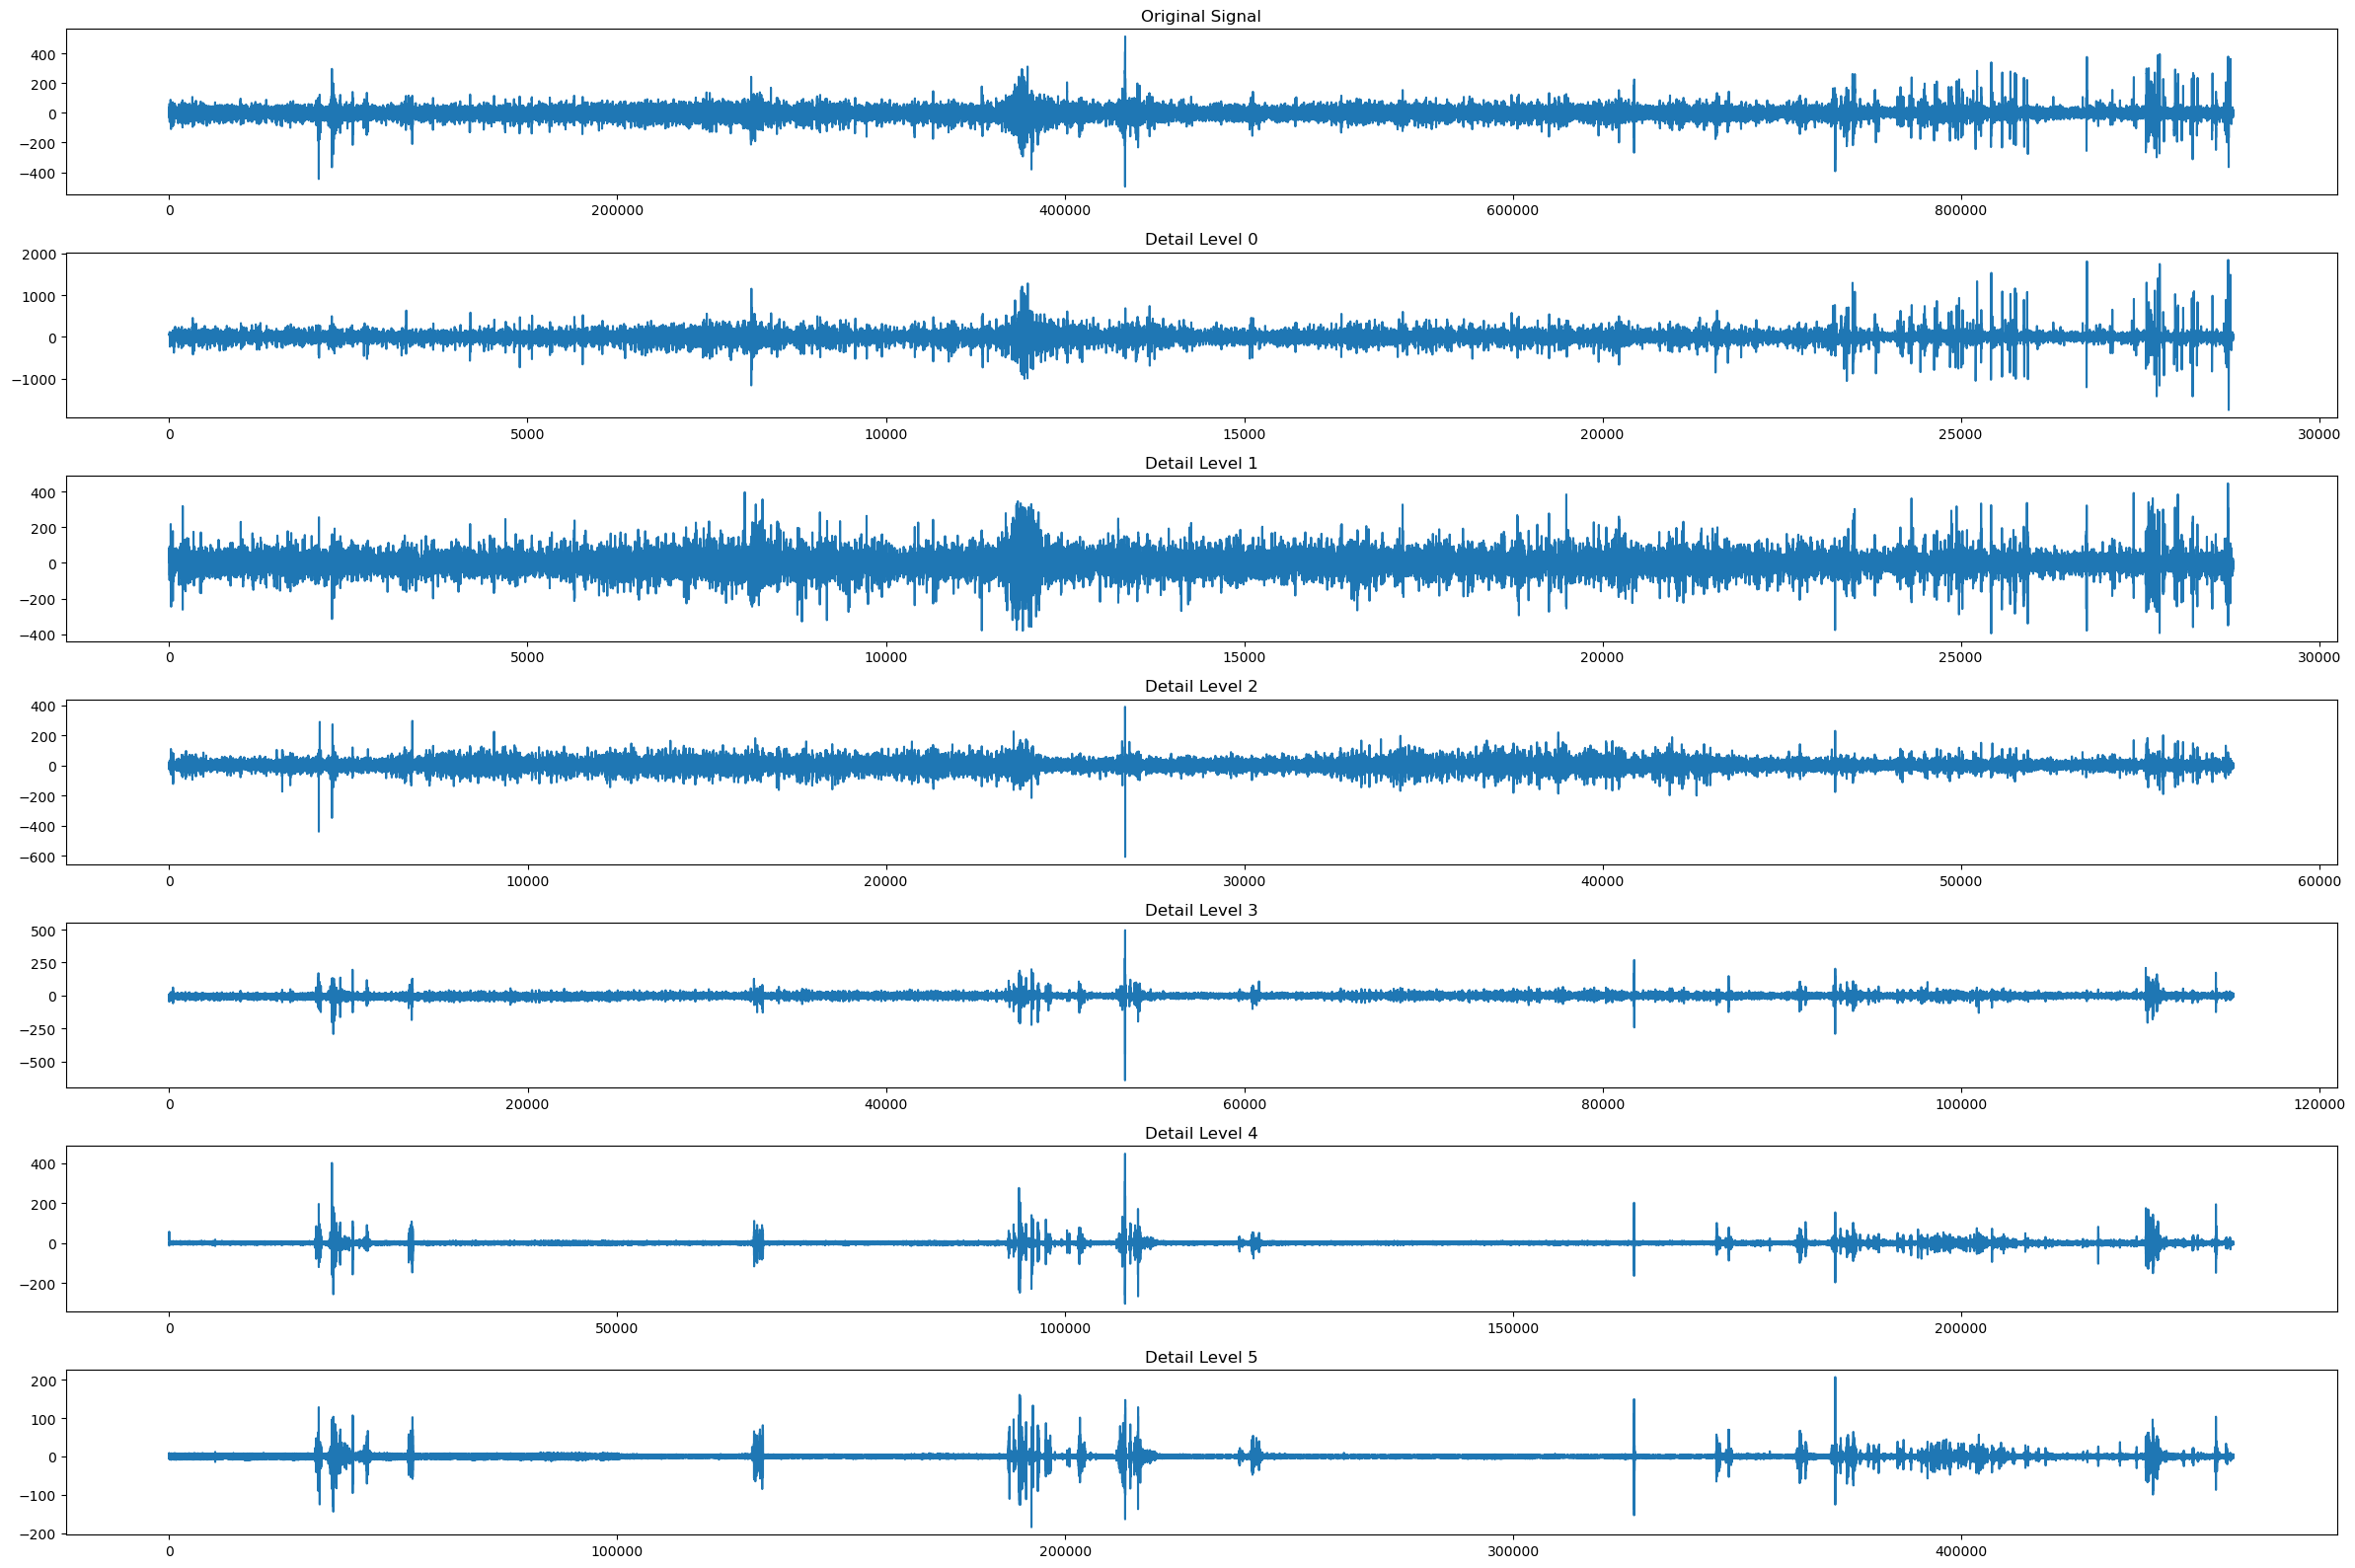

In [15]:
import pyedflib
import pywt
import numpy as np
import matplotlib.pyplot as plt

# 打开EDF文件
file_path = r"C:\Users\LinziGoooosh\Downloads\chbmit\1.0.0\chb01\chb01_04.edf"
f = pyedflib.EdfReader(file_path)

# 读取第一个通道的数据
signal = f.readSignal(1)

# 进行小波变换
coeffs = pywt.wavedec(signal, 'db4', level=5)  # 使用Daubechies 4小波，分解5层

# 绘制原始信号
plt.figure(figsize=(24, 16))
plt.subplot(len(coeffs) + 1, 1, 1)
plt.plot(signal)
plt.title('Original Signal')

# 绘制小波变换后的各个分量
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs) + 1, 1, i + 2)
    plt.plot(coeff)
    plt.title(f'Detail Level {i}')

plt.tight_layout()
plt.show()

# 关闭文件
f.close()

In [1]:
import mne
import numpy as np

def preprocess_data_mne_with_timestamps(file_name):
    """
    使用 mne 库预处理 EEG 数据，并在每个窗口数据前加入对应的时间戳。
    """

    # 加载数据
    raw = mne.io.read_raw_edf(file_name, preload=True)

    # 应用带通滤波器
    raw.filter(1., 50., fir_design='firwin')

    # 选择 EEG 通道
    raw.pick_types(meg=False, eeg=True, eog=False)

    # 定义短时间窗口的参数
    window_length = 3  # 窗口长度（秒）
    sfreq = raw.info['sfreq']  # 采样频率
    window_samples = int(window_length * sfreq)

    # 初始化一个空列表来存储预处理后的数据和时间戳
    preprocessed_data_with_timestamps = []

    # 遍历每个窗口中的数据
    for start in range(0, len(raw.times), window_samples):
        end = start + window_samples
        if end > len(raw.times):
            break

        # 提取并预处理这个窗口中的数据
        window_data, times = raw[:, start:end]
        window_data = np.squeeze(window_data)

        # 获取窗口的开始时间戳
        timestamp = raw.times[start]

        # 将时间戳和预处理后的窗口数据一起存储
        preprocessed_data_with_timestamps.append((timestamp, window_data))

    return preprocessed_data_with_timestamps

In [7]:
import pyedflib

# 打开EDF文件
file_path = r"C:\Users\LinziGoooosh\Downloads\chbmit\1.0.0\chb01\chb01_03.edf"
f = pyedflib.EdfReader(file_path)

# 获取信号数量
n_signals = f.signals_in_file

# 创建一个字典来存储每个通道的数据尺寸
channel_sizes = {}

# 遍历每个通道并获取数据尺寸
for i in range(n_signals):
    # 获取当前通道的数据点数量
    n_samples = f.getNSamples()[i]
    # 获取当前通道的采样频率
    sampling_rate = f.getSampleFrequencies()[i]
    # 将数据尺寸信息存储到字典中
    channel_sizes[f.getSignalLabels()[i]] = {
        'n_samples': n_samples/256,
        'sampling_rate': sampling_rate
    }

# 打印每个通道的数据尺寸
for channel, size in channel_sizes.items():
    print(f"Channel: {channel}, Samples: {size['n_samples']}")

# 关闭文件
f.close()

Channel: FP1-F7, Samples: 3600.0
Channel: F7-T7, Samples: 3600.0
Channel: T7-P7, Samples: 3600.0
Channel: P7-O1, Samples: 3600.0
Channel: FP1-F3, Samples: 3600.0
Channel: F3-C3, Samples: 3600.0
Channel: C3-P3, Samples: 3600.0
Channel: P3-O1, Samples: 3600.0
Channel: FP2-F4, Samples: 3600.0
Channel: F4-C4, Samples: 3600.0
Channel: C4-P4, Samples: 3600.0
Channel: P4-O2, Samples: 3600.0
Channel: FP2-F8, Samples: 3600.0
Channel: F8-T8, Samples: 3600.0
Channel: T8-P8, Samples: 3600.0
Channel: P8-O2, Samples: 3600.0
Channel: FZ-CZ, Samples: 3600.0
Channel: CZ-PZ, Samples: 3600.0
Channel: P7-T7, Samples: 3600.0
Channel: T7-FT9, Samples: 3600.0
Channel: FT9-FT10, Samples: 3600.0
Channel: FT10-T8, Samples: 3600.0


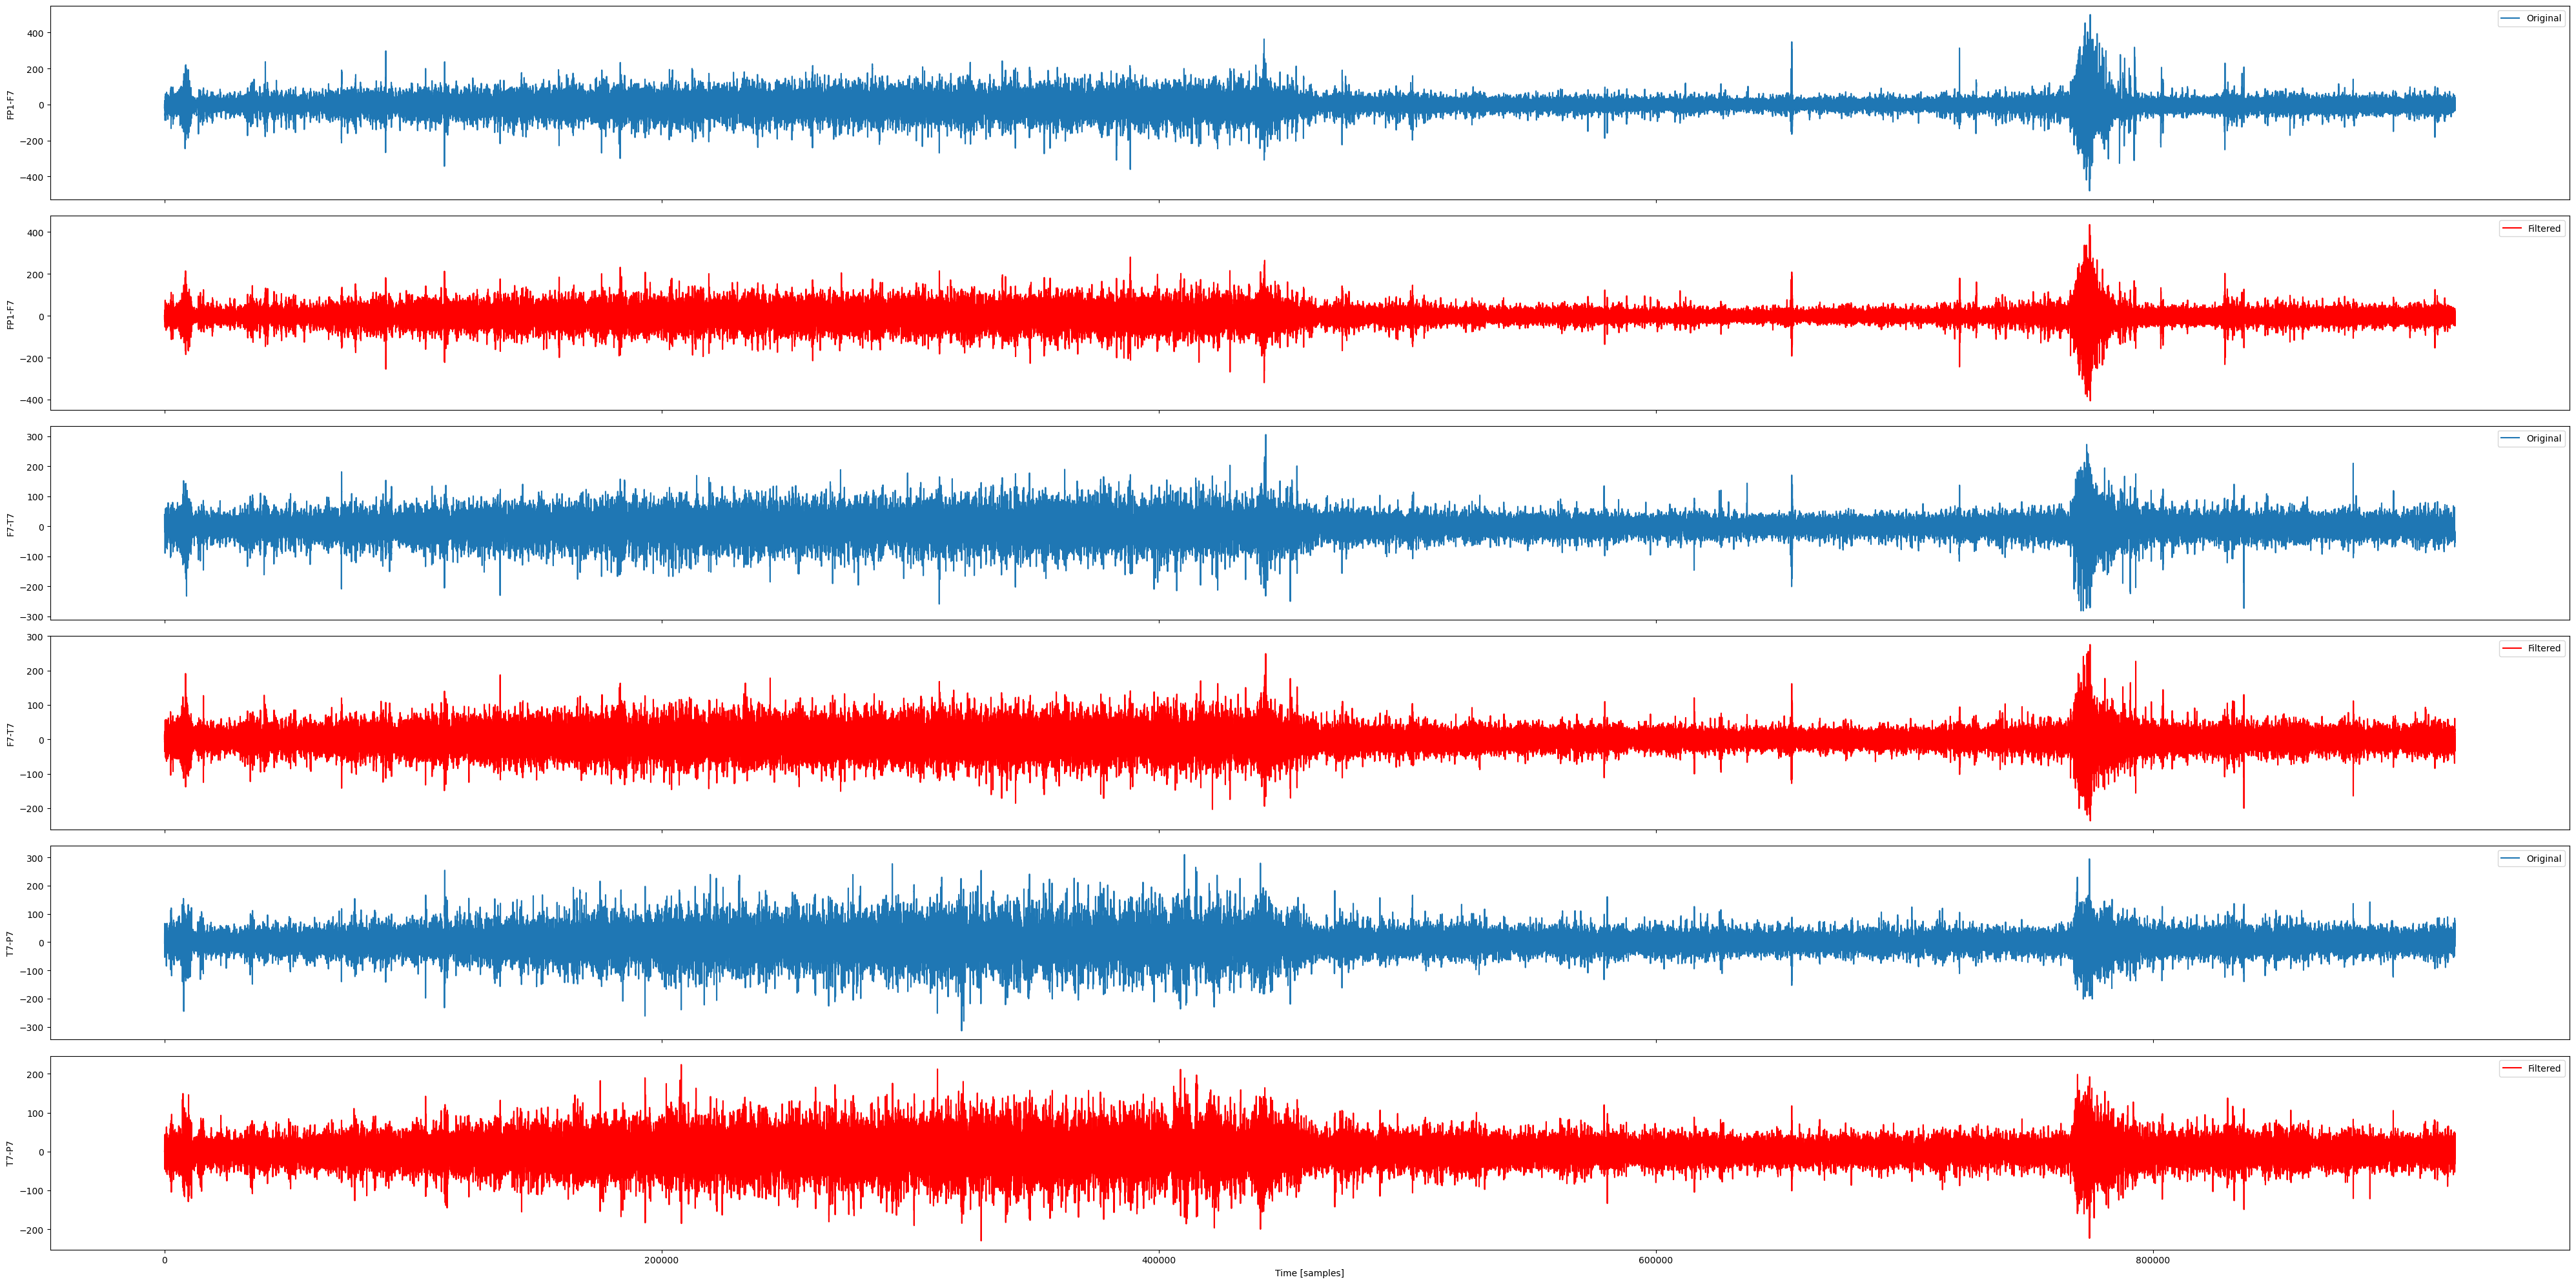

In [6]:
import pyedflib
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# 预处理函数：带通滤波器
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

# 打开EDF文件
file_path = r"C:\Users\LinziGoooosh\Downloads\chbmit\1.0.0\chb01\chb01_03.edf"
f = pyedflib.EdfReader(file_path)

# 获取信号标签和采样频率
signal_labels = f.getSignalLabels()
sampling_frequency = f.getSampleFrequencies()[0]  # 假设所有通道的采样频率相同

# 定义预处理参数
lowcut = 1.0  # 低截止频率
highcut = 50.0  # 高截止频率
order = 5  # 滤波器阶数

# 创建一个图形和6个子图
fig, axs = plt.subplots(6, 1, figsize=(40, 20), sharex=True)

# 遍历每个信号并绘制预处理前后的数据
for i in range(3):  # 只选取前三个通道
    signal = f.readSignal(i)
    
    # 预处理信号
    filtered_signal = butter_bandpass_filter(signal, lowcut, highcut, sampling_frequency, order)
    
    # 绘制预处理前的数据
    axs[2*i].plot(signal, label='Original')
    axs[2*i].set_ylabel(signal_labels[i])
    axs[2*i].legend()
    
    # 绘制预处理后的数据
    axs[2*i+1].plot(filtered_signal, label='Filtered', color='r')
    axs[2*i+1].set_ylabel(signal_labels[i])
    axs[2*i+1].legend()

# 设置x轴标签
axs[-1].set_xlabel('Time [samples]')

# 调整布局并显示图形
plt.tight_layout()
plt.show()

# 关闭文件
f.close()

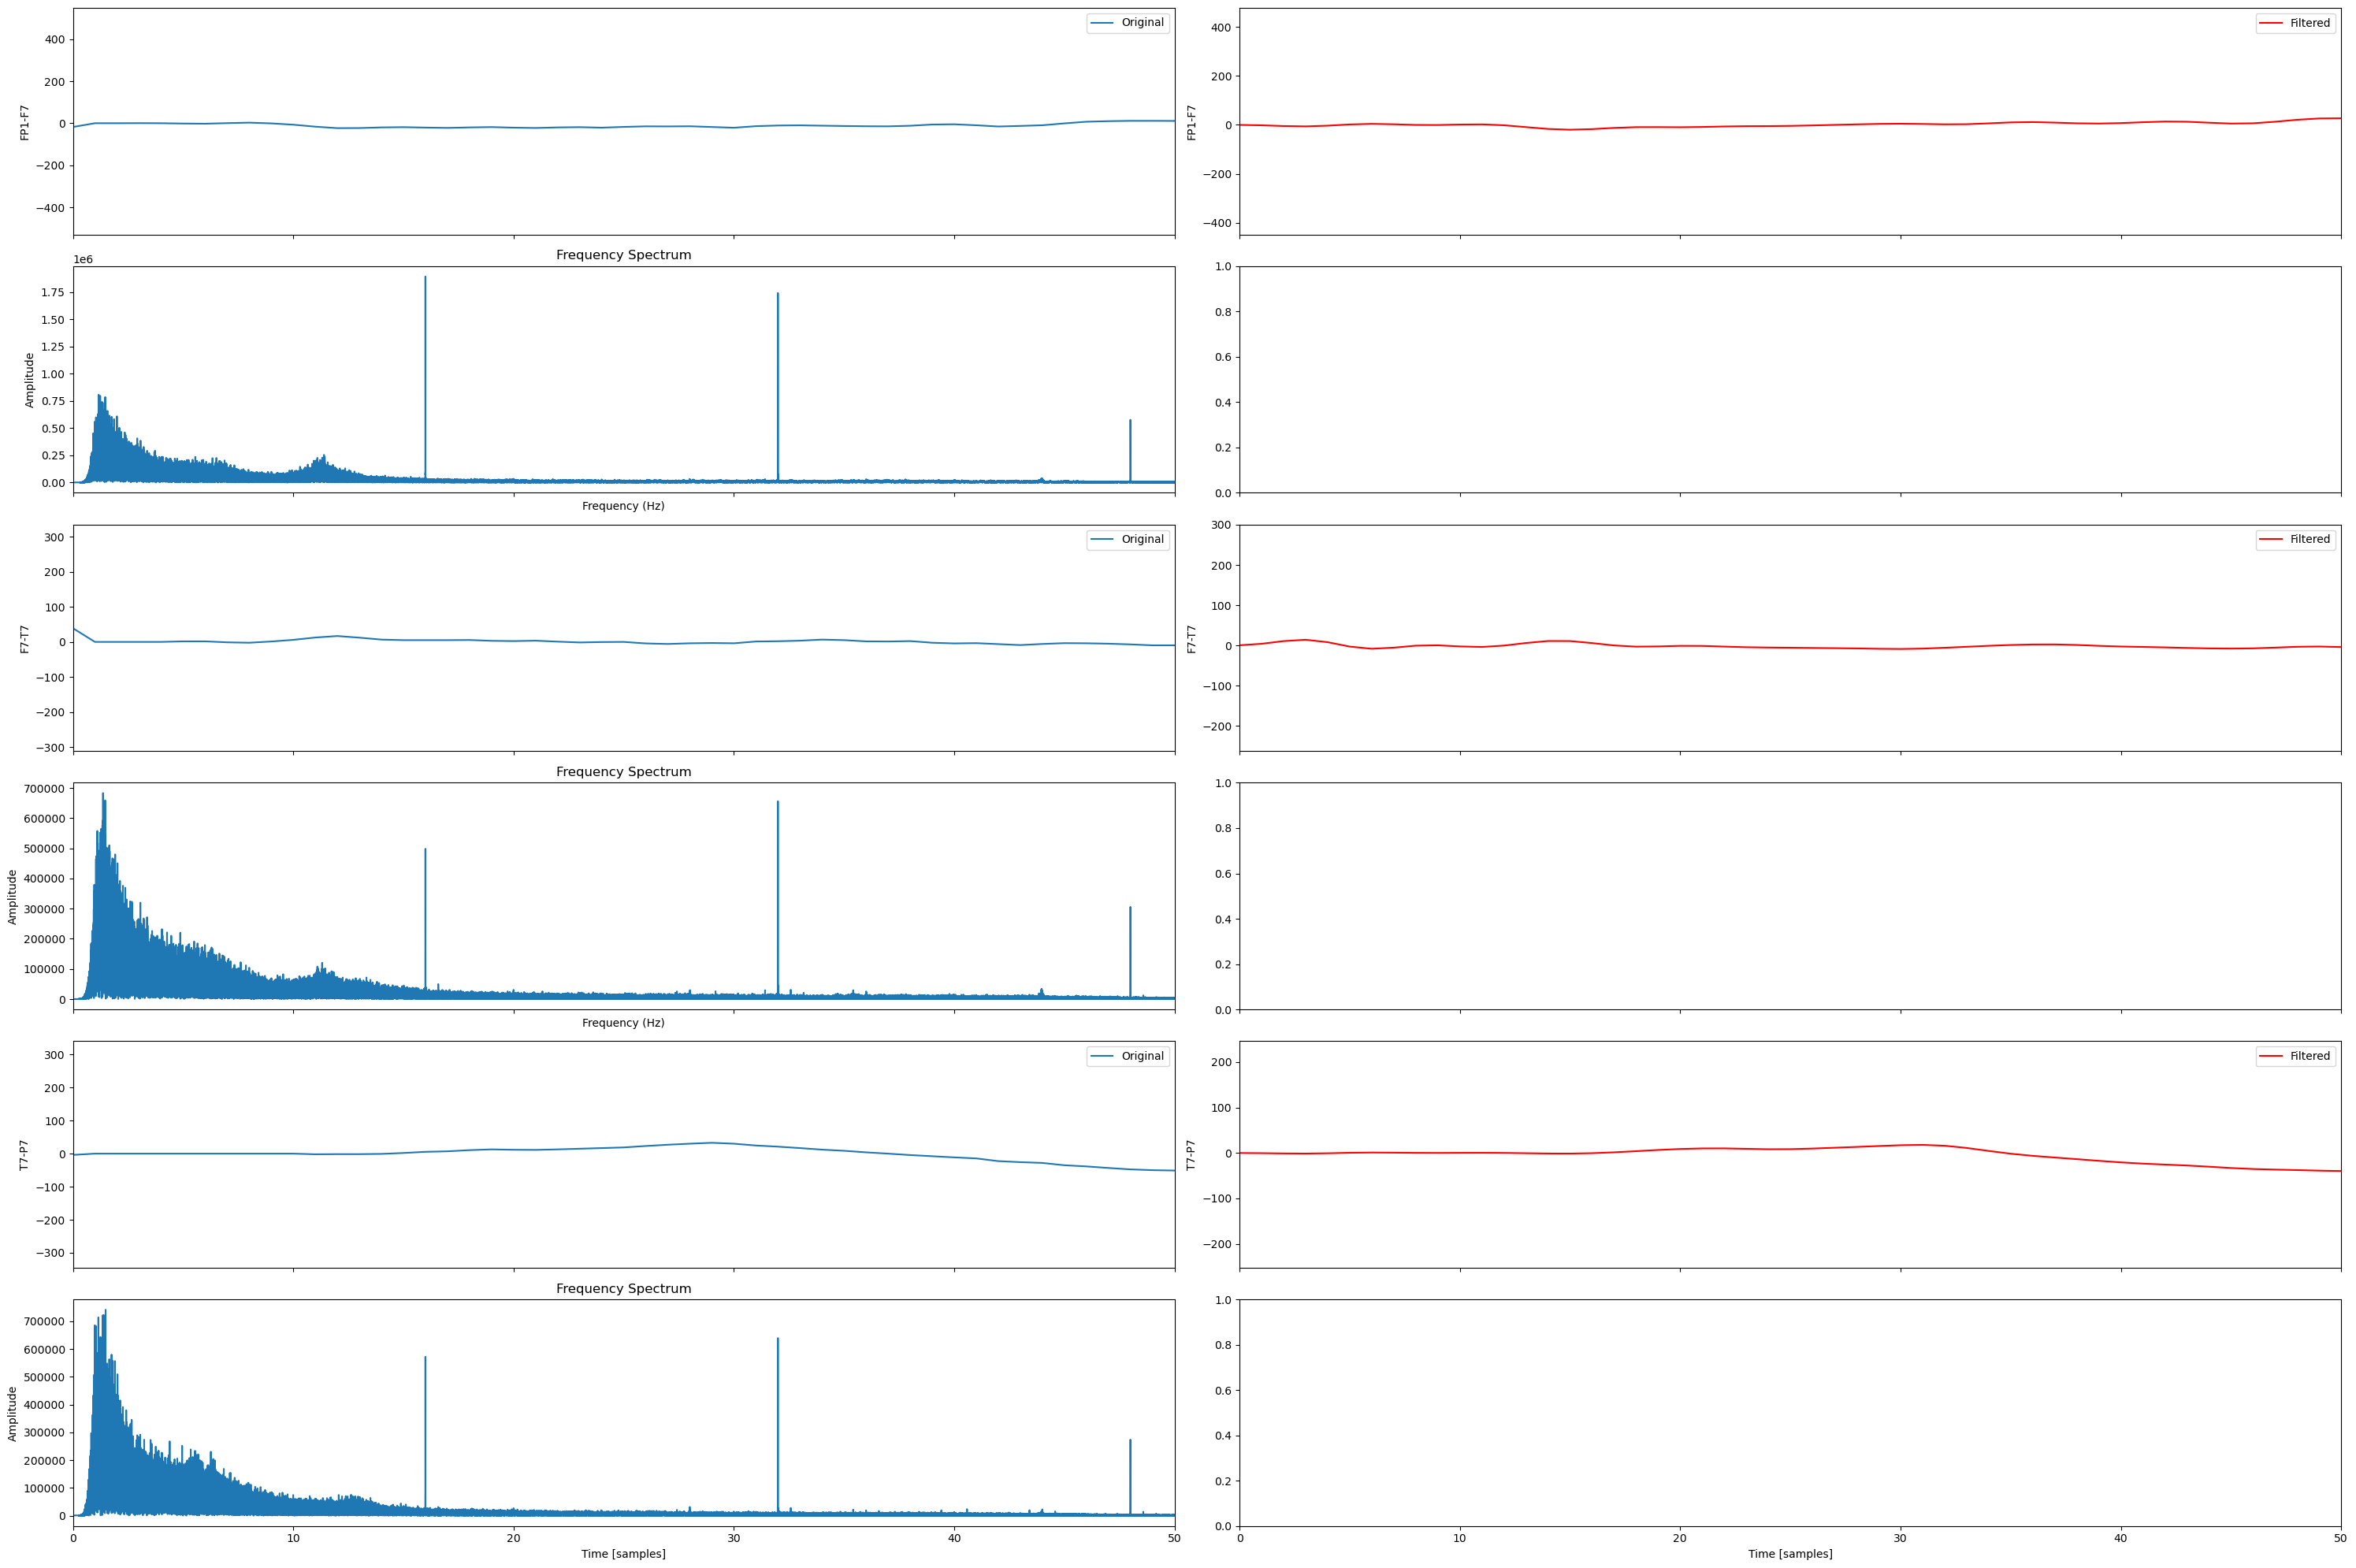